## Comparative Analysis of Heart Disease Prediction using Machine Learning 

## Project Goals

1. Develop accurate machine learning models to predict the presence of heart disease.

2. Compare and evaluate the performance of multiple algorithms (Logistic Regression, Random Forest, XGBoost).

3. Identify the most significant clinical and physiological factors contributing to heart disease.

4. Provide data-driven insights to support early diagnosis and preventive healthcare strategies.

5. Build and save a deployable model that can predict heart disease risk in real time.

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

import joblib
import warnings
warnings.filterwarnings('ignore')

## Data collection and Preprocessing

In [6]:
# Load dataset
heart_data = pd.read_csv("heart.csv")   # Make sure your CSV file is in the same directory
print("Dataset Loaded Successfully!\n")
heart_data.head()

Dataset Loaded Successfully!



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# Basic info
print("\n--- Data Info ---\n")
print(heart_data.info())


--- Data Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
# missing values
print("\n--- Missing Values ---\n", heart_data.isnull().sum())


--- Missing Values ---
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
#statistical measure of the above data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#checking the distribution of target variables
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Exploratory Data Analysis

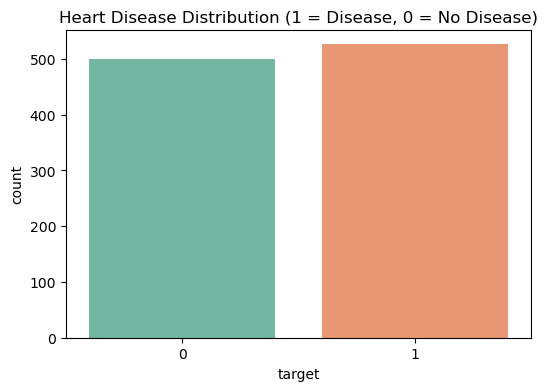

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=heart_data, palette='Set2')
plt.title('Heart Disease Distribution (1 = Disease, 0 = No Disease)')
plt.show()

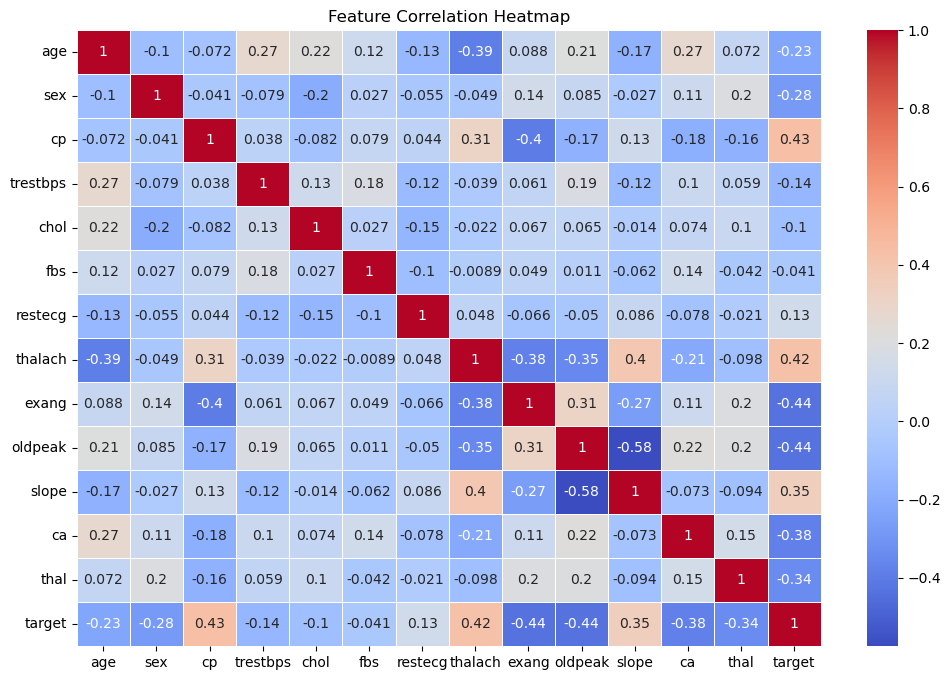

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Splitting the Features and The Target

In [14]:
# Split Data
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [15]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [16]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


## Splitting the data into the training and testing data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Training Samples:", X_train.shape)
print("Testing Samples:", X_test.shape)

Training Samples: (820, 13)
Testing Samples: (205, 13)


## Model Training

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Train Multiple Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(
    n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2, bootstrap=True, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [20]:
print("\n--- Model Comparison ---\n")
results = []
for name, model in models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    cv_score = cross_val_score(model, X_train_scaled, Y_train, cv=5).mean()
    results.append([name, acc, cv_score])
    print(f"{name} → Accuracy: {acc:.4f}, Cross-Val: {cv_score:.4f}")

results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Cross-Validation'])
print("\n", results_df)


--- Model Comparison ---

Logistic Regression → Accuracy: 0.8098, Cross-Val: 0.8439
Random Forest → Accuracy: 0.9268, Cross-Val: 0.8988
Support Vector Machine → Accuracy: 0.9268, Cross-Val: 0.9122
K-Nearest Neighbors → Accuracy: 0.8634, Cross-Val: 0.8500

                     Model  Test Accuracy  Cross-Validation
0     Logistic Regression       0.809756          0.843902
1           Random Forest       0.926829          0.898780
2  Support Vector Machine       0.926829          0.912195
3     K-Nearest Neighbors       0.863415          0.850000



--- Confusion Matrices for All Models ---



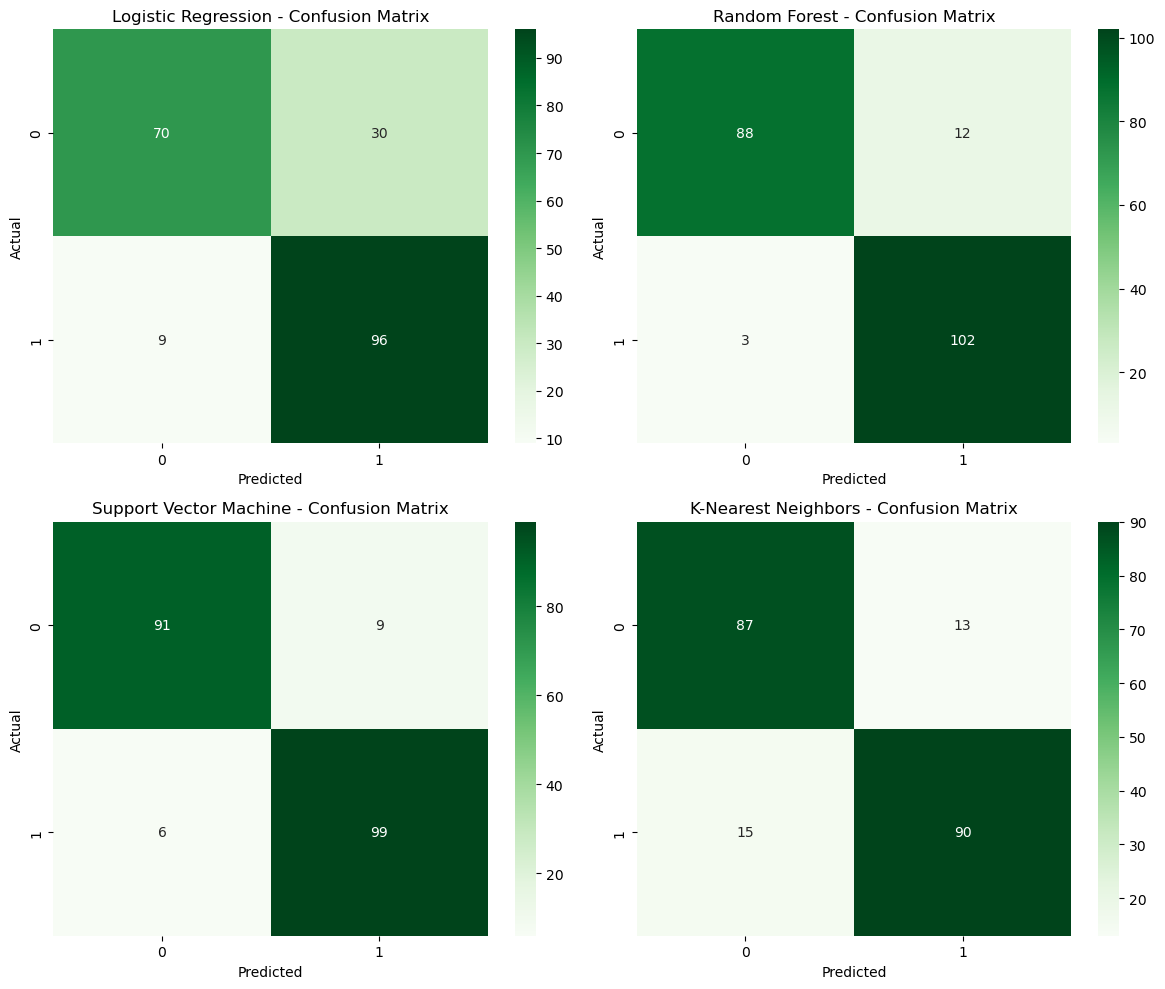

In [21]:
print("\n--- Confusion Matrices for All Models ---\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[i])
    axes[i].set_title(f'{name} - Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


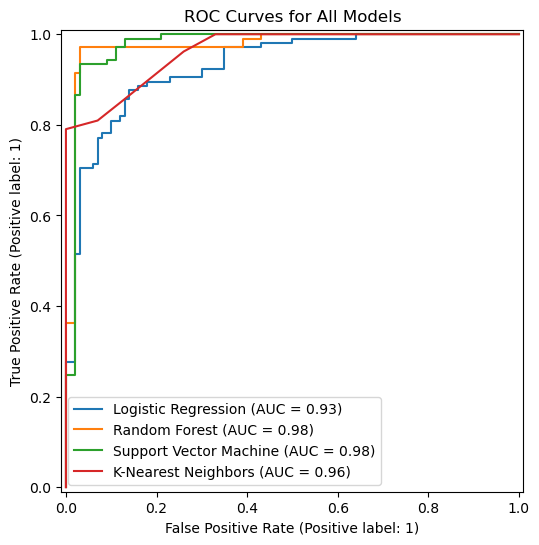

In [22]:
# ROC Curves for All Models
# -------------------------------
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    RocCurveDisplay.from_predictions(Y_test, y_prob, name=name, ax=plt.gca())
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

## Model Performance

In [23]:
# Model Performance Summary
# -------------------------------
results_df = results_df.sort_values(by='Cross-Validation', ascending=False)
print("\n=== Final Model Comparison ===\n")
print(results_df)


=== Final Model Comparison ===

                    Model  Test Accuracy  Cross-Validation
2  Support Vector Machine       0.926829          0.912195
1           Random Forest       0.926829          0.898780
3     K-Nearest Neighbors       0.863415          0.850000
0     Logistic Regression       0.809756          0.843902


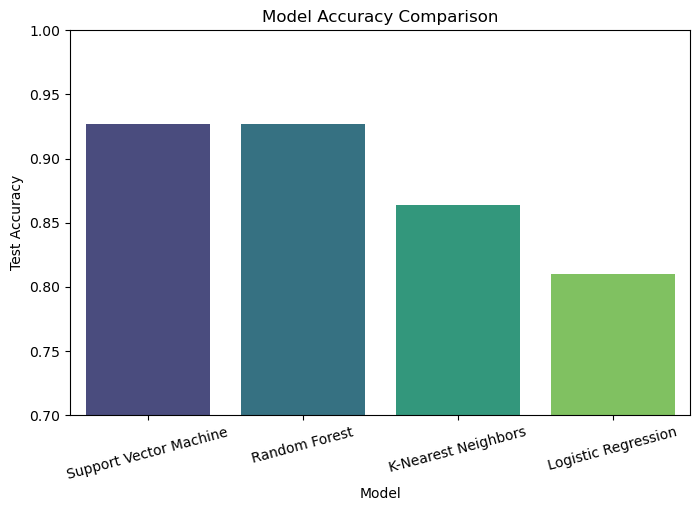

In [24]:
# Accuracy Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Test Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.show()

In [25]:
# -------------------------------
# 📊 Classification Reports for All Models
# -------------------------------
for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(Y_test, y_pred))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.89      0.97      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93 

In [26]:
# Hyperparameter Tuning (Best Model)

print("\n--- Hyperparameter Tuning for Logistic Regression ---\n")
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, Y_train)
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Score:", grid.best_score_)


--- Hyperparameter Tuning for Logistic Regression ---

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Val Score: 0.8439024390243903


## Model Evaluation

In [27]:
# Evaluate Tuned Model

y_pred = best_model.predict(X_test_scaled)
print("\n--- Classification Report ---\n")
print(classification_report(Y_test, y_pred))



--- Classification Report ---

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



## Tuned Logistic Regression - Confusion Matrix

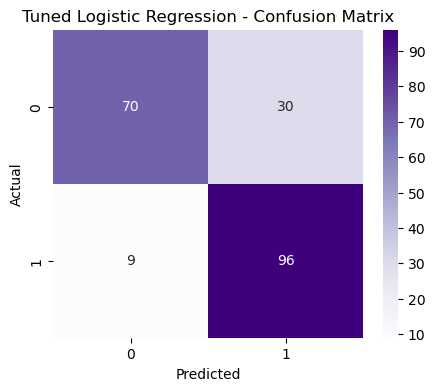

In [28]:
#specifies which model this matrix is for
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Tuned Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC-AUC Score & ROC Curve – Tuned Logistic Regression

ROC-AUC Score: 0.9298095238095239


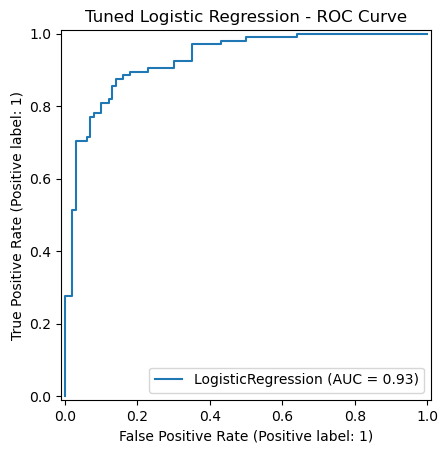

In [29]:
print("ROC-AUC Score:", roc_auc_score(Y_test, best_model.predict_proba(X_test_scaled)[:,1]))

RocCurveDisplay.from_estimator(best_model, X_test_scaled, Y_test)
plt.title('Tuned Logistic Regression - ROC Curve')
plt.show()


In [30]:
# Final Pipeline (Scaling + Model)
# -------------------------------
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

final_pipeline.fit(X_train, Y_train)
print("\n✅ Final Model Trained Successfully!")
print("Final Accuracy:", final_pipeline.score(X_test, Y_test))



✅ Final Model Trained Successfully!
Final Accuracy: 0.8097560975609757


In [31]:
# Save Model

joblib.dump(final_pipeline, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'logistic_regression_best.pkl')
print("✅ Model & Scaler Saved Successfully!")


✅ Model & Scaler Saved Successfully!


In [32]:

# Input data as dictionary with column names (must match training data)
input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3)
input_data = np.array(input_data).reshape(1, -1)
prediction = final_pipeline.predict(input_data)

print("\n--- New Data Prediction ---")
if prediction[0] == 1:
    print("💔 The person is likely to have Heart Disease.")
else:
    print("💚 The person is unlikely to have Heart Disease.")



--- New Data Prediction ---
💚 The person is unlikely to have Heart Disease.
